<a href="https://colab.research.google.com/github/ffedot/ML-VVSUE-LAB-1/blob/main/%D0%9A%D0%BE%D1%80%D1%88%D1%83%D0%BD%D0%BE%D0%B2_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/Coffe_sales.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')
df['cash_type'] = df['cash_type'].astype('category')
df['coffee_name'] = df['coffee_name'].astype('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')
df['Month_name'] = df['Month_name'].astype('category')
df['Date'] = df['Date'].astype('category')
df['Time'] = df['Time'].astype('category')

In [17]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.coffee_name
X = df.drop('coffee_name', axis=1)

## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [18]:
X.describe(include='all')

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547.000000,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,3,7,12,NaN,NaN,381,3547
top,NaN,card,NaN,Afternoon,Tue,Mar,NaN,NaN,2024-10-11,22:59:18.544000
freq,NaN,3547,NaN,1205,572,494,NaN,NaN,26,1
mean,14.185791,NaN,31.645216,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


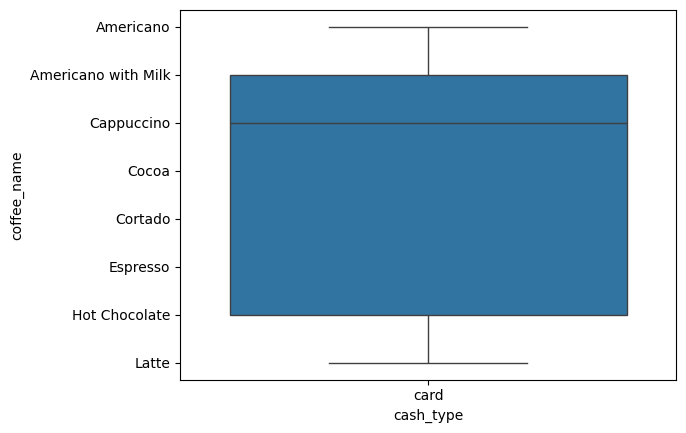

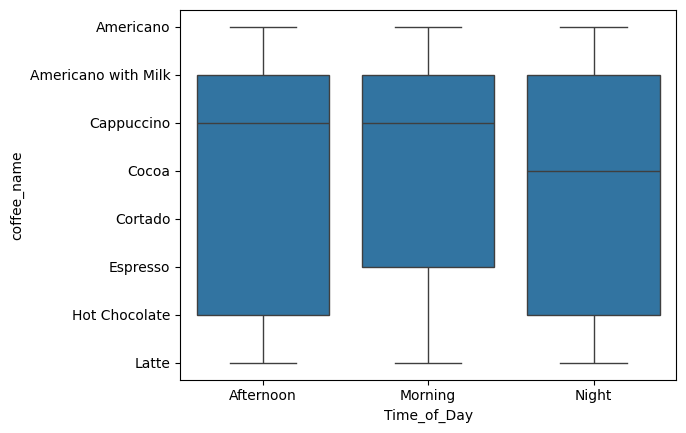

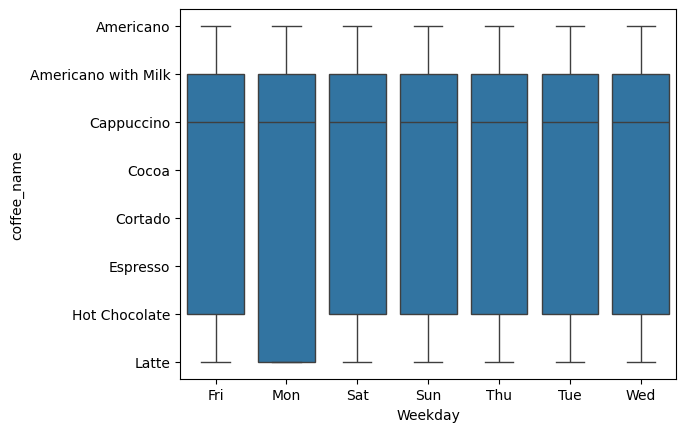

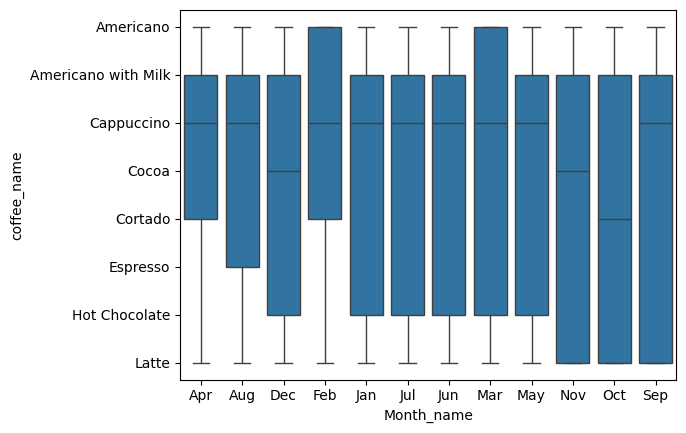

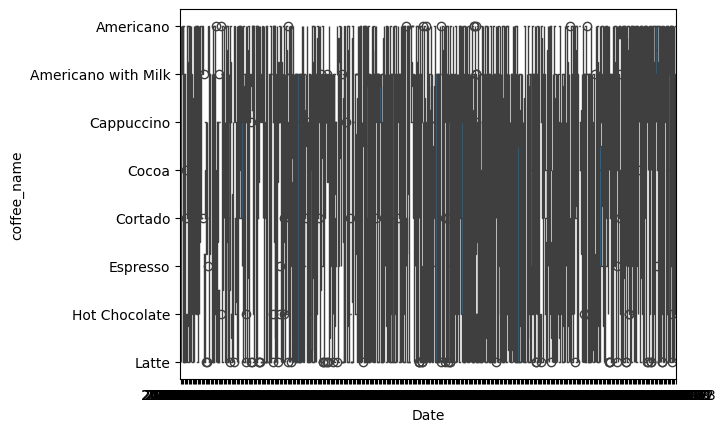

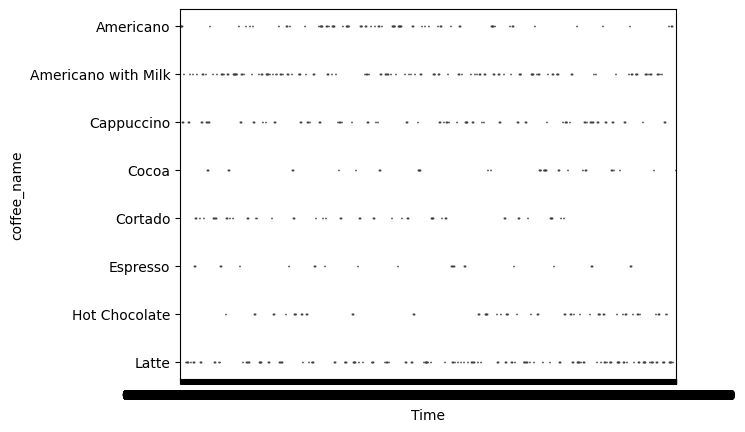

числовые


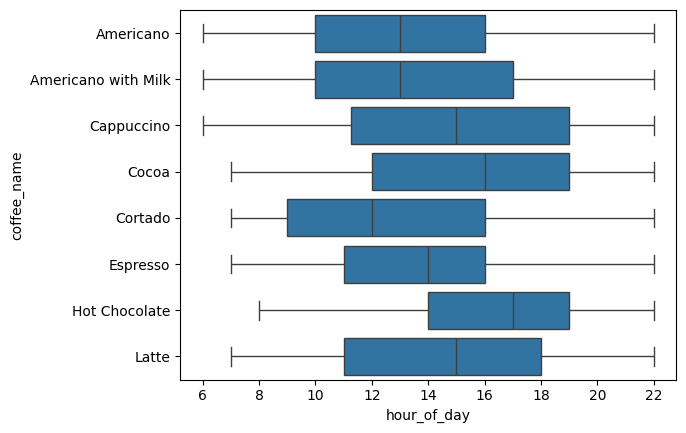

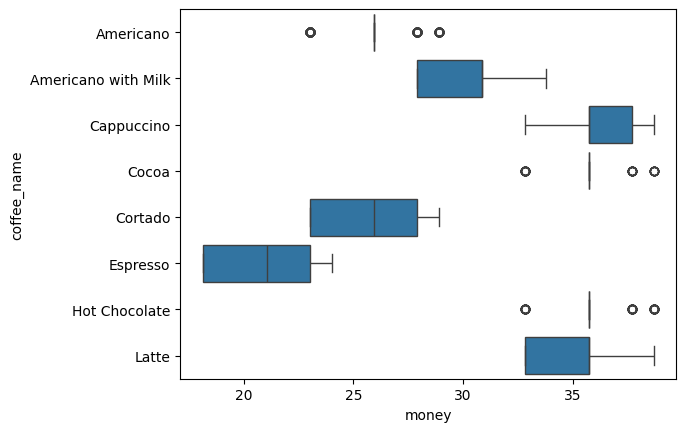

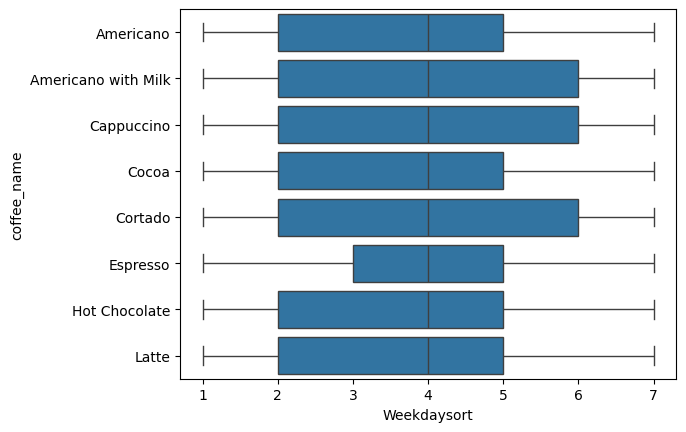

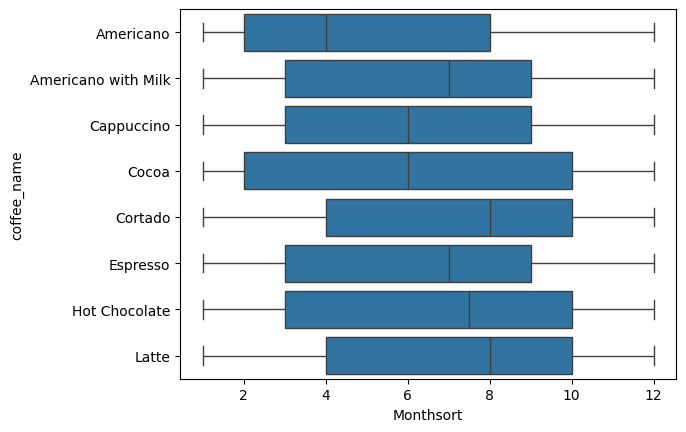

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['category']).columns

for feature in cat_features:
    plt.figure()
    sns.boxplot(data=df, x=feature, y=y)
    plt.show()
print("числовые")
for feature in num_features:
    plt.figure()
    sns.boxplot(data=df, x=feature, y=y)
    plt.show()




In [21]:
# пропусков не было
print("Пропуски:")
print(df.isnull().sum())

Пропуски:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [ ]:
categorial_features = [] # перечислить названия колонок с категориальными фичами
numeric_features = [] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест